# Jupyter Notebook 2015 UX Survey Results

## Executive Summary

The following are the key takeaways from our analysis of the survey response data. The remainder of this notebook gives evidence for these points.

**Experienced Users**

People who use Jupyter frequently (daily/weekly), who have been using it for more than a year, and who have been in their job role for 2+ years are most heavily represented in the survey data. The majority of respondants self-identify as data scientists, students, scientists, and researchers.

**Like the Notebook Concept**

Unsurprisingly, respondents state that they like the ability to quickly analyze, visualize, explore, and describe data in rich notebook documents that they can share. As such, the interactive computing paradigm should remain central to the user experience and continue to improve over time.

**Need More than Notebooks**

Respondents find that the Jupyter Notebook lacks features they require to complete their data analytics workflow. To address these gaps, the respondents request a wide variety of features and integrations. The most common requests are the following:

* Version control (via git in particular)
* Robust text and code editing (like in Emacs, Vim, Sublime, PyCharm)
* Advanced code development tools (debugging, profiling, variable watching, code modularization)
* Simpler export and deployment options (one-click transformations to slides, scripts, reports) 

The project roadmap should incorporate these suggestions to ensure that Jupyter continues to address the needs of end users.

**Need More Help**

Respondents state that installation of Jupyter Notebook should be easier to perform and understand, both for single users and groups of users. Respondents commonly cite documentation, tutorials, and help as ways to improve the situtation.

## About the Survey

In late 2015, members of the Jupyter Community conducted a 16-question survey about the Jupyter Notebook user experience. The survey ran on [SurveyGizmo](https://www.surveygizmo.com/) from December 21, 2015 until January 15, 2016. Posts on the [Project Jupyter Google Group](https://groups.google.com/forum/#!topic/jupyter/XCzJ02Rzj0Y), on the [Jupyter blog](http://blog.jupyter.org/2015/12/22/jupyter-notebook-user-experience-survey/), and from the [@ProjectJupyter Twitter account](https://twitter.com/ProjectJupyter/status/684096608166776832) were used to share the survey link and solicit responses. At the conclusion of the survey, the raw response data were [posted to GitHub](https://github.com/jupyter/surveys/tree/master/surveys/2015-12-notebook-ux) along with a description of the data format.

## About our Analysis

Starting with the raw response data, we ([@parente](https://github.com/parente), [@jtyberg](https://github.com/jtyberg)):

1. Toyed with ways to [extract the salient points from the free text responses](prep/1_ux_survey_review.ipynb)
2. Made the data [more pandas-friendly](prep/2_clean_survey.ipynb)
3. Tried a few different approaches to [identifying keyword patterns and aggregating them into themes](prep/3a_hinderance_themes.ipynb)
4. Repeated our keyword pattern search and theme annotation approach (see below) across all remaining free-text questions (e.g., [integration](prep/3b_integration_themes.ipynb), [needs addressed](prep/3c_needs_addressed_themes.ipynb), [needs not addressed](prep/3d_needs_not_addressed_themes.ipynb), etc.)
5. Summarized our findings in this notebook.

Step #4 constituted the bulk of the analysis work. The notebooks in the [prep](prep/) folder have all the details. The next section includes a brief summary of key terms from our methodology that are used in this report.

## About this Notebook

In this notebook, we lend evidence to the claims made in the executive summary at the top of this notebook. We include written observations, plots, and interactive widgets for exploring the results.

You may:

1. View this notebook as a static webpage on [NBViewer](https://nbviewer.jupyter.org/github/jupyter/surveys/blob/master/surveys/2015-12-notebook-ux/analysis/report_dashboard.ipynb) or [GitHub](https://github.com/jupyter/surveys/blob/master/surveys/2015-12-notebook-ux/analysis/report_dashboard.ipynb). (No interactivity, one plot per section)
2. Interact with the widgets in this notebook using [Binder](https://mybinder.org/v2/gh/jupyter/surveys/master). (Plot keywords vs themes, group by respondent categories, show counts or precentages within groups, modify the code yourself, click *View &rarr; Dashboard Preview* to see just the output)

<a name="key-terms"></a>
<div class="alert alert-info"><b>Key Terms</b>
<p>To best understand and interact with the plots below, keep the following in mind:</p>

<ul>
<li><b>Respondents</b> did not necessarily answer every survey question. We considered the available responses, regardless of whether the user answered other questions or not. As a result, the total response count varies across the plots below, especially when grouping by other response categories.</li>
<li><b>Keyword patterns</b> are the common regular expression patterns we identified by sampling the responses. They represent terms and phrases that actually appear in the free-text responses. We optimized these for recall more than precision.</li>
<li><b>Annotator themes</b> are our subjective groupings of keyword patterns. They are an attempt to identify common topics within the responses.</li>
</ul>
</div>

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
%matplotlib inline

In [3]:
import os
import glob
import pandas as pd
import seaborn as sns

In [4]:
%load_ext jupyter_cms

Read the utils notebook which has all the plotting and widget routines. (We didn't want them all in here cluttering the static report.)

In [5]:
utils = load_notebook('./prep/5_utils.ipynb')

In [6]:
sns.set(rc={"figure.figsize": (14,6)})
sns.set_palette(sns.color_palette("Set1", n_colors=9, desat=0.6))

Read the responses with shortened column names.

In [7]:
df = pd.read_csv('./prep/survey_short_columns.csv', index_col=0)

Merge in the themes and keywords for the free-text questions.

In [8]:
files = glob.glob('./prep/*_themes.csv')
files.append('./prep/roles.csv')
for fn in files:
    theme_df = pd.read_csv(fn, sep=';', index_col=0)
    df = df.merge(theme_df, left_index=True, right_index=True, how='left')

Cut-down the number of primary roles for better plotting. Keep the top 8 and bin the rest as "other".

In [9]:
top_roles = df.roles_primary.value_counts()[:8].index

In [10]:
df.loc[~df.roles_primary.isnull() & ~df.roles_primary.isin(top_roles), 'roles_primary'] = 'other'

In [11]:
df.roles_primary.value_counts()

data_scientist       162
student              130
scientist            101
developer             84
researcher            69
other                 63
engineer              45
educator              40
financial_analyst     28
Name: roles_primary, dtype: int64

When we group repsonses by primary role, order the legend from the largest cadre to the smallest.

In [12]:
utils.group_orders['roles_primary'] = top_roles.tolist()

## About the Survey Respondents

We start with information about the respondants themselves. Most of the questions in this section have a fixed set of possible responses. Only one allows for free text responses.

### How often do you use Jupyter Notebook?

The majority of respondants use the notebook on a daily and weekly basis.

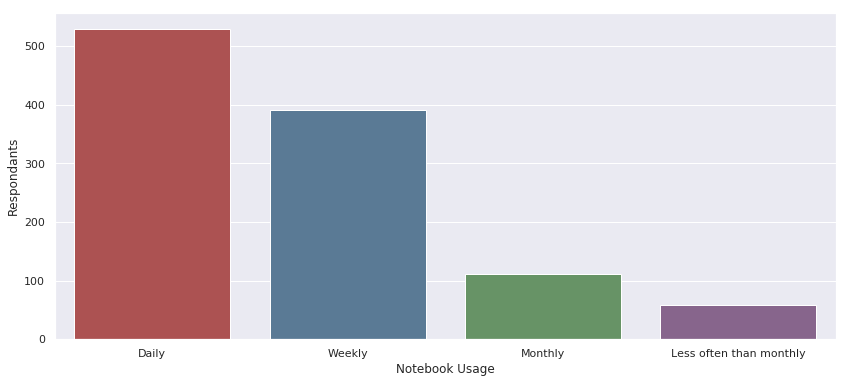

In [13]:
how_often_counts = df.how_often.value_counts().reindex(utils.group_orders['how_often'])
ax = sns.barplot(how_often_counts.index, how_often_counts.values)
ax.set_ylabel('Respondants')
_ = ax.set_xlabel('Notebook Usage')

### Roughly how long have you been using Jupyter Notebook?

The majority of respondents have been Jupyter Notebook users for longer than a year.

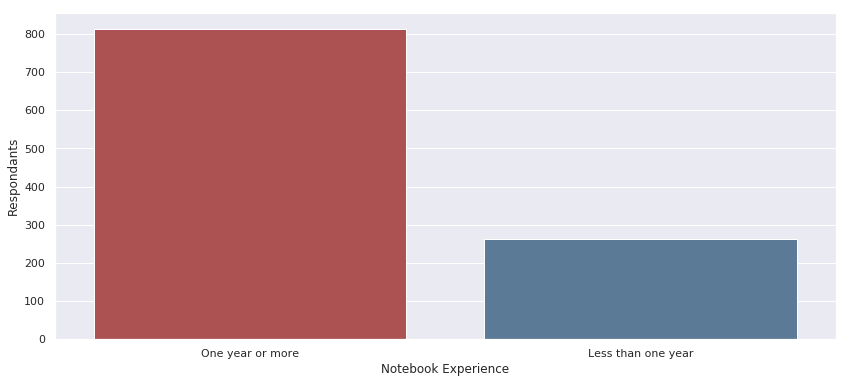

In [14]:
how_long_counts = df.how_long_used.value_counts().reindex(utils.group_orders['how_long_used'])
ax = sns.barplot(how_long_counts.index, how_long_counts.values)
ax.set_ylabel('Respondants')
_ = ax.set_xlabel('Notebook Experience')

The distribution of frequency of use is skewed toward daily/weekly in both the more and less experienced user groups.

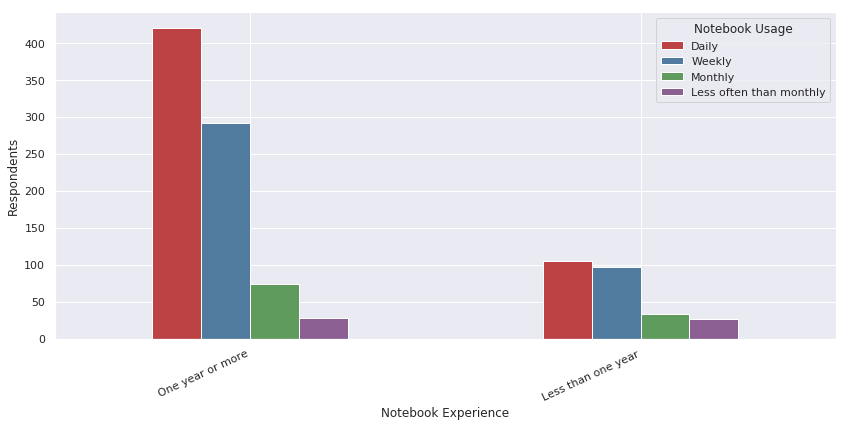

In [15]:
long_x_often = pd.crosstab(df.how_long_used, df.how_often)
long_x_often = long_x_often.reindex(utils.group_orders['how_long_used'], utils.group_orders['how_often'])
long_x_often.columns.name = 'Notebook Usage'
ax = long_x_often.plot(kind='bar')
ax.set_ylabel('Respondents')
ax.set_xlabel('Notebook Experience')
_ = ax.set_xticklabels(ax.get_xmajorticklabels(), rotation=25, ha='right')

### What is your primary role when using Jupyter Notebook (e.g., student, astrophysicist, financial modeler, business manager, etc.)?

Most respondents name a single job role (e.g., data scientist). Some state more than one (e.g., student, practicing statistician). Data scientist, student, scientist, researcher, and developer are the most common.

In [16]:
utils.explore(df, [df.roles_roles, df.roles_keywords], utils.default_labels[::-1])

interactive(children=(Dropdown(description='show', options=('Annotator themes', 'Keyword patterns'), value='An…

### How many years have you been in this role?

Most respondents have 2+ years of experience in their job role.

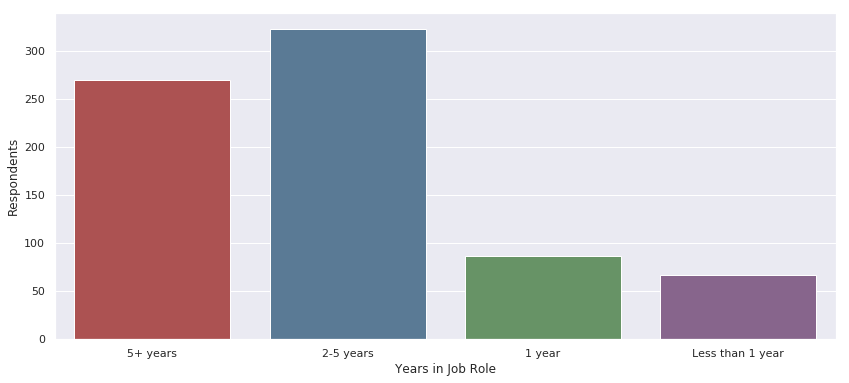

In [17]:
counts = df.years_in_role.value_counts()
counts = counts.reindex(utils.group_orders['years_in_role'])
ax = sns.barplot(counts.index, counts.values)
ax.set_ylabel('Respondents')
_ = ax.set_xlabel('Years in Job Role')

### How do you run the Jupyter Notebook?

The vast majority of respondants run Jupyter as a standalone application.

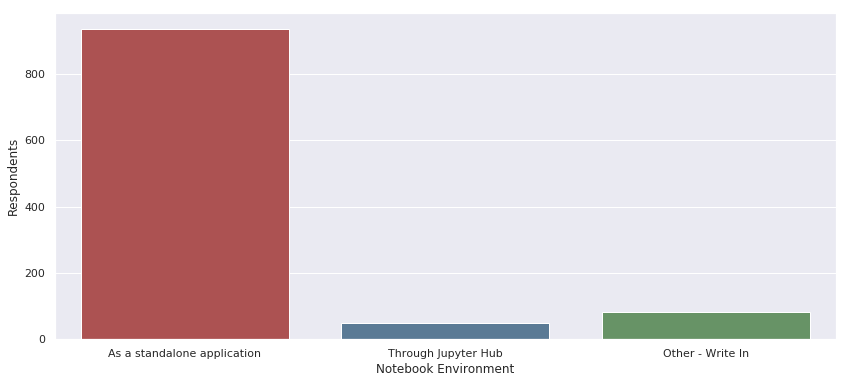

In [18]:
counts = df.how_run.value_counts()
counts = counts.reindex(utils.group_orders['how_run'])
ax = sns.barplot(counts.index, counts.values)
ax.set_ylabel('Respondents')
_ = ax.set_xlabel('Notebook Environment')

Write-in responses vary widely. Many are more specific versions of "as a standalone application."

In [19]:
df.how_run_other.dropna().sample(15).to_frame('Random sample of 15 write-in responses').reset_index(drop=True)

,Random sample of 15 write-in responses
0,Both
1,On top of Spark
2,PyCharm
3,Compute Cluster w/ SSH Tunnels
4,SageMath
5,standalone and cloud based
6,docker toolbox
7,Via custom makefile
8,Jupyter notebook at the command line
9,"osx+conda on workstation, docker+pip on server"


### How many people typically see and/or interact with the results of your work in Jupyter Notebook? 

*Consider people who view your notebooks on nbviewer, colleagues who rerun your notebooks, developers who star your notebook repos on GitHub, audiences who see your notebooks as slideshows, etc.*

Most of the respondents create notebooks for tens or hundreds of users. Few write for thousands of users or more.

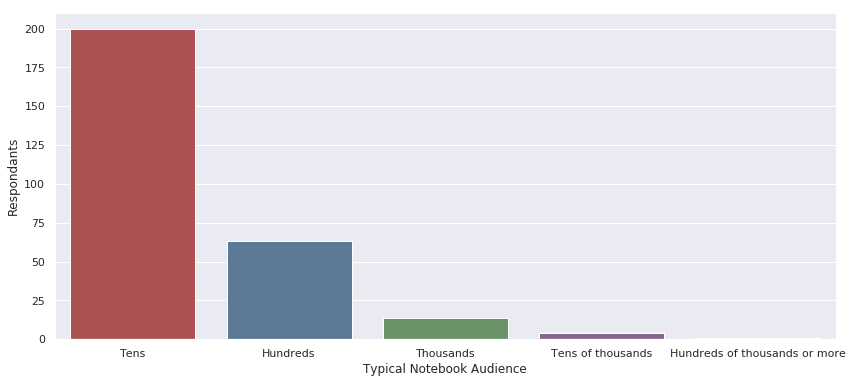

In [20]:
counts = df.audience_size.value_counts()
counts = counts.reindex(utils.group_orders['audience_size'])
ax = sns.barplot(counts.index, counts.values)
ax.set_ylabel('Respondants')
_ = ax.set_xlabel('Typical Notebook Audience')

## What the Respondents Said

Now we look at responses to questions about the notebook. All of the questions in this section have free-text responses. Revisit the blue **Key Terms** section at the top for help reading the plots.

### What needs in your workflow does Jupyter Notebook address?

Respondents frequently indicate that Jupyter Notebook addresses their need to analyze, explore, visualize, interact with, and document data quickly and easily.

In [21]:
utils.explore(df, [df.workflow_needs_addressed_keywords], 
              labels=['Keyword patterns'])

interactive(children=(Dropdown(description='show', options=('Keyword patterns',), value='Keyword patterns'), D…

### What aspects of Jupyter Notebook make it pleasant to use in your workflow?

Ease of use, the tight interactive workflow, and the ability to combine inline markup with rich media top the list of pleasant aspects noted by respondents.

In [22]:
utils.explore(df, [df.pleasant_aspects_keywords, df.pleasant_aspects_themes])

interactive(children=(Dropdown(description='show', options=('Keyword patterns', 'Annotator themes'), value='Ke…

### What, if anything, hinders you from making Jupyter Notebook an even more regular part of your workflow?

Respondants cite the need for better development tools as the main blocker more regular use of the notebook. More robust text editing capability, version control, cleaner integration with languages and tools, and better documentation all top the list.

In [23]:
utils.explore(df, [df.hinderances_keywords, df.hinderances_themes])

interactive(children=(Dropdown(description='show', options=('Keyword patterns', 'Annotator themes'), value='Ke…

### What needs in your workflow does Jupyter Notebook not address?

As expected, nearly the same themes and keywords that top the hinderances list also top the list of workflow needs not addressed by the Jupyter Notebook today.

In [24]:
utils.explore(df, [df.workflow_needs_not_addressed_keywords, df.workflow_needs_not_addressed_themes])

interactive(children=(Dropdown(description='show', options=('Keyword patterns', 'Annotator themes'), value='Ke…

### What aspects of Jupyter Notebook make it difficult to use in your workflow?

Respondents most often report difficulty with code editing, installing the application, working in the browser, version controlling notebooks, and working without the support of a full IDE.

In [25]:
utils.explore(df, [df.difficult_aspects_keywords, df.difficult_aspects_themes])

interactive(children=(Dropdown(description='show', options=('Keyword patterns', 'Annotator themes'), value='Ke…

### What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?

Git is by far and away the most oft requested integration. Specific tools like vim, d3, matplotlib, R and Spark as well as general concepts like interactivity, debugging, better editors, and version control are also mentioned frequently.

In [26]:
utils.explore(df, [df.integrations_keywords, df.integrations_themes])

interactive(children=(Dropdown(description='show', options=('Keyword patterns', 'Annotator themes'), value='Ke…

### What new features or changes would you like to see in Jupyter Notebook?

*Please list anything that comes to mind that helps you in your workflow, big or small.*

Version control with Git also tops the list of requested features and changes. Adding a workspace/IDE to the user experience, supporting custom styles (both visual and functional, ala keymaps), embedding ancillary tools (e.g., filebrowser sidebar), and behaving more like major text editors (e.g., Vim, Atom, Sublime) are also common requests.

In [27]:
utils.explore(df, [df.features_changes_keywords, df.features_changes_themes])

interactive(children=(Dropdown(description='show', options=('Keyword patterns', 'Annotator themes'), value='Ke…

### Thinking back to when you first started using Jupyter Notebook, what enhancements would have made your initial experience better?

Respondents most frequently name installation improvements, better documentation, a better keyboard map, and tutorials as enhancements that would have improved their first experience.

In [28]:
utils.explore(df, [df.first_experience_enhancements_keywords, df.first_experience_enhancements_themes])

interactive(children=(Dropdown(description='show', options=('Keyword patterns', 'Annotator themes'), value='Ke…

### Select all the words that best describe Jupyter Notebook.

Respondents select positive words to describe Jupyter Notebook far more often than negative words. The convenience of the notebook stands out.

In [29]:
utils.explore(df, [df.keywords.str.replace(';',',')], ['Fixed keywords'])

interactive(children=(Dropdown(description='show', options=('Fixed keywords',), value='Fixed keywords'), Dropd…

*Powerful* tops the list of write-in responses. The long-tail varys quite a bit, with both positive and negative sentiments expressed.

In [30]:
df.keywords_other.str.lower().value_counts().head(10).to_frame('Respondents')

,Respondents
powerful,8
awesome,4
essential,2
magic,2
interactive,2
wildly underdocumented,1
"powerful, if you can get just what you want.",1
handy,1
gamechanging,1
hard to change basic editor behavior,1


## Conclusion and Next Steps

From this survey we learned that experienced users like the notebook concept for its simplicity in quickly exploring, visualizing, and describing data, but they need more than notebooks in their analytics workflow, and they suggest all users need more help getting started. Going forward, we recommend that the Jupyter community:

* Constantly ensure that the Jupyter Notebook retains what users value today
* Work solutions to the most common hinderances and feature requests into the Jupyter roadmap
* Run more specific user experience studies / surveys in the future about major changes and additions 
    * For example, if a first pass of git integration lands on jupyter/notebook master, stand up a Binder with that feature enabled, and invite users to try it before landing it in a stable Jupyter release.